# Key Machine Learning Concepts

Understanding fundamental machine learning concepts is essential for building robust models. In this section, we will cover essential topics such as the bias-variance tradeoff, overfitting and underfitting, the importance of the train-test split, and cross-validation.

---

## Table of Contents

1. [Bias-Variance Tradeoff](#1-bias-variance-tradeoff)
2. [Overfitting and Underfitting](#2-overfitting-and-underfitting)
3. [Train-Test Split](#3-train-test-split)
4. [Cross-Validation](#4-cross-validation)
5. [Regularization](#5-regularization)
6. [Evaluation Metrics](#6-evaluation-metrics)

---

## 1. Bias-Variance Tradeoff

The **bias-variance tradeoff** is a key concept that describes the tension between underfitting (high bias) and overfitting (high variance). It helps us understand the balance needed to make a model generalize well.

- **Bias** refers to the error introduced by approximating a real-world problem with a simplified model. High bias means the model is too simple and unable to capture the complexities of the data.
- **Variance** refers to the model's sensitivity to small changes in the training data. High variance means the model is too complex and captures noise along with the underlying patterns.

### Bias-Variance Graph

Visualizing this tradeoff helps clarify the relationship between model complexity and error.

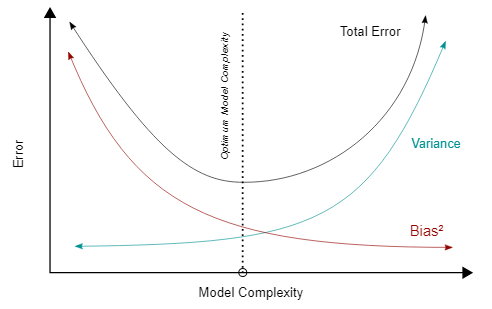

*If a model is too simple (high bias), it will perform poorly on both training and test data. Conversely, if a model is too complex (high variance), it will perform well on training data but poorly on test data (overfitting).*

## 2. Overfitting and Underfitting
### Overfitting
Overfitting occurs when a model captures noise or irrelevant details in the training data, making it perform poorly on unseen data.
Symptoms: High accuracy on training data but low accuracy on test data.
#### Causes of Overfitting:
- Model complexity: A model with too many parameters may fit the noise in the data.
- Small datasets: Not enough data for the model to learn general patterns.
#### Prevention Methods:
- Regularization: Adding constraints or penalties to the model to prevent over-complexity.
- Pruning (for Decision Trees): Cutting branches that may fit noise.
- Dropout (for Neural Networks): Randomly turning off some neurons during training to prevent reliance on certain patterns.
### Underfitting
Underfitting occurs when a model is too simple and cannot capture the underlying patterns in the data.
Symptoms: Poor performance on both training and test datasets.
#### Causes of Underfitting:
- Using overly simple models (e.g., linear regression for non-linear data).
- Not enough features or poor feature engineering.
#### Solutions for Underfitting:
- Increase model complexity: Use a more powerful algorithm.
- Feature engineering: Add more meaningful features to help the model better capture patterns.

*Balancing overfitting and underfitting is crucial for achieving good model performance.*

## 3. Train-Test Split
The train-test split is an essential step in machine learning to evaluate how well your model generalizes to unseen data.

- Training Set: This is the portion of the dataset used to train the model.
- Test Set: This is the portion used to evaluate the model's performance.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

data = pd.read_csv("iris.csv")
data["species"] = LabelEncoder().fit_transform(data["species"])

X = data.drop(columns="species")  
y = data["species"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (120, 4)
Testing set size: (30, 4)


Guidelines for Train-Test Split:
- A typical split is 80% for training and 20% for testing, but it can vary.
- Ensure the test data is not used during training to provide an unbiased estimate of model performance.

## 4. Cross-Validation
Cross-validation is a more reliable way to evaluate model performance compared to a single train-test split. It helps ensure that the model generalizes well to new data by using multiple training and testing subsets.
### K-Fold Cross-Validation:
In K-fold cross-validation, the dataset is split into K subsets. The model is trained on K-1 subsets and tested on the remaining one. This process is repeated K times, with each subset used as the test set once.

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()

cv_scores = cross_val_score(model, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.         0.85215955 0.         0.76225759 0.        ]
Average cross-validation score: 0.3228834275997373


Advantages of Cross-Validation:
- Provides a better estimate of model performance.
- Reduces the risk of overfitting to a particular train-test split.

## 5. Regularization
Regularization is a technique used to reduce model complexity and prevent overfitting by adding a penalty for larger coefficients in the model.
### Types of Regularization:
- L1 Regularization (Lasso): Adds a penalty equal to the absolute value of the coefficients.
- L2 Regularization (Ridge): Adds a penalty equal to the square of the coefficients.

*Regularization is especially useful for models with many features, as it prevents overfitting by shrinking coefficients.*

In [15]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=100, n_features=20, noise=0.1, random_state=42)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=.3, random_state=42)

lasso = Lasso(alpha=0.1)  # The alpha parameter controls the strength of regularization
lasso.fit(X_train1, y_train1)

y_pred_lasso = lasso.predict(X_test1)

ridge = Ridge(alpha=0.1)  # The alpha parameter controls the strength of regularization
ridge.fit(X_train1, y_train1)

y_pred_ridge = ridge.predict(X_test1)

## 6. Evaluation Metrics
After training the model, it's important to evaluate its performance using appropriate metrics. The choice of metrics depends on the type of problem (classification or regression).

### For Classification Problems:
- Accuracy: The ratio of correctly predicted instances to total instances.
- Precision: The ratio of true positive predictions to all positive predictions.
- Recall (Sensitivity): The ratio of true positive predictions to all actual positives.
- F1-Score: The harmonic mean of precision and recall.
### For Regression Problems:
- Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values.
- R-squared: Represents the proportion of variance in the target variable that is predictable from the features.

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average="macro")
recall = recall_score(y_test, y_pred,average="macro")
f1 = f1_score(y_test, y_pred,average="macro")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


For imbalanced datasets, metrics like precision, recall, and F1-score are more informative than accuracy.